In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Main matplotlib concepts**

- Figure: The overall container that holds all your subplots (Axes) and other elements.
- Axes: The individual plotting regions inside the Figure where the data is visualized.
- Artists: All the visual elements that get drawn within an Axes, such as lines, markers, text, and more.


Matplotlib is basically a hierarchy of Artists inside Axes inside a Figure.

Link

https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

**The two APIs matplotlib provides**


State‑based, pyplot interface / functional interface  vs.  Object‑oriented (OO) API

Quick code comparison of both APIs:

**State‑based**

```
    plt.plot(...)
    plt.title(...)
    plt.xlabel(...)
```

**Object‑oriented (OO) API**
```
    ax.plot(...)
    ax.set_title(...)
    ax.set_xlabel(...)
```

Importantly both APIs start from the same import

In [2]:
time = np.arange(0., 10., 0.2)
velocity = np.zeros_like(time, dtype=float)
distance = np.zeros_like(time, dtype=float)

g = 9.8 	# m/s^2
velocity = g * time
distance = 0.5 * g * np.power(time, 2)

**State‑based API**

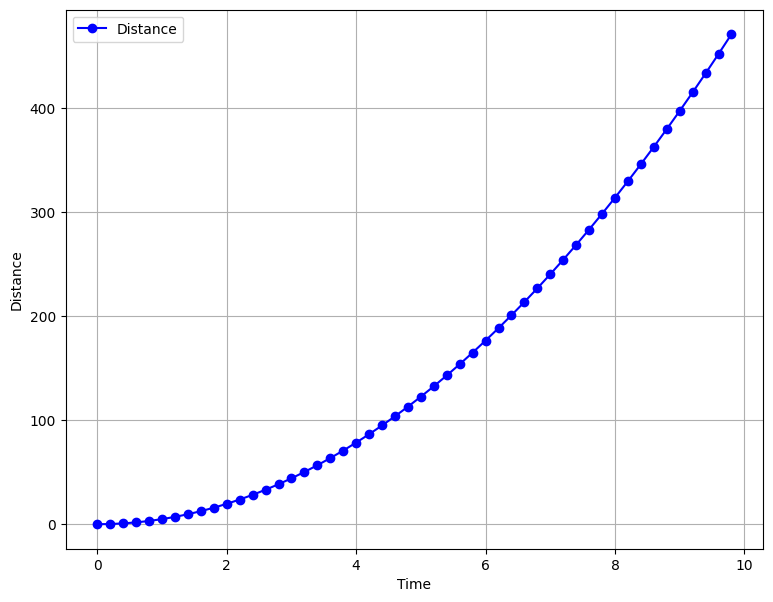

In [3]:
plt.figure(figsize=(9,7), dpi=100)
plt.plot(time,distance,'bo-')
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend(["Distance"])
plt.grid(True)
plt.show()

**Object‑oriented (OO) API**

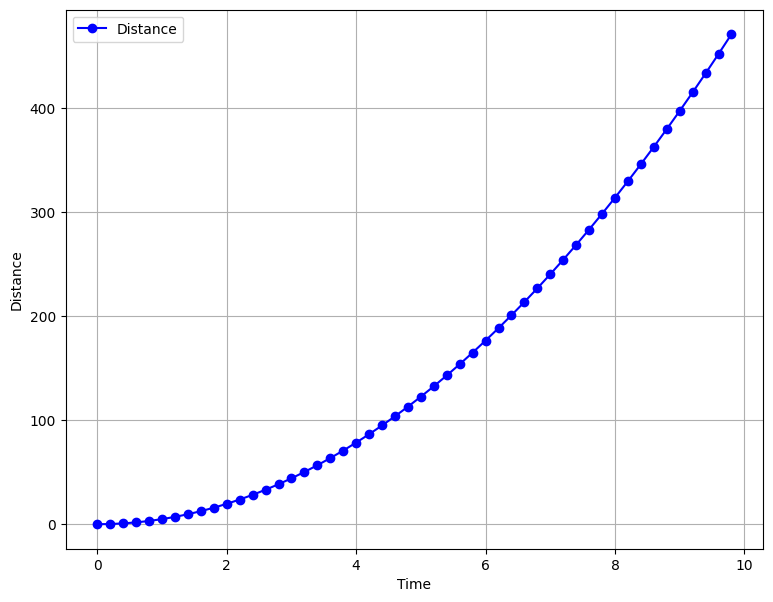

In [4]:
fig, ax = plt.subplots(figsize=(9, 7), dpi=100)

ax.plot(time, distance, 'bo-')
ax.set_xlabel("Time")
ax.set_ylabel("Distance")
ax.legend(["Distance"])
ax.grid(True)

plt.show()

**EXAMPLES OF VARIOUS PLOTS**

SAMPLE DATA (used for all examples)


In [5]:
x = np.linspace(0, 10, 35)
y = np.sin(x)
y2 = np.cos(x)

categories = ["A", "B", "C", "D"]
values = [23, 45, 12, 30]

data = np.random.randn(500)
matrix = np.random.rand(10, 10)

image_array = np.random.rand(100, 100, 3)  # fake RGB image

errors = np.random.rand(35) * 0.2
errors_other = np.random.rand(35) * 0.4

https://www.pythonsnacks.com/p/matplotlib-6-common-plots

**1.) LINE PLOT**

Connect data point with straight lines.

It's commonly used for time series data, showing how variables change over time, or displaying mathematical functions. So it is ideal for showing trends over time or continuous data.




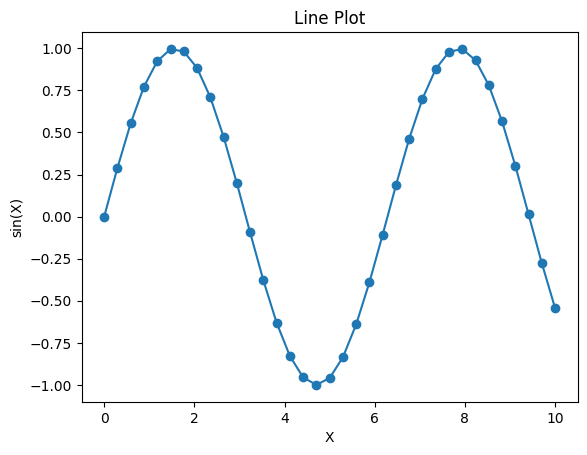

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')
ax.set_title("Line Plot")
ax.set_xlabel("X")
ax.set_ylabel("sin(X)")
plt.show()

You can also plot multiple lines on single graph.

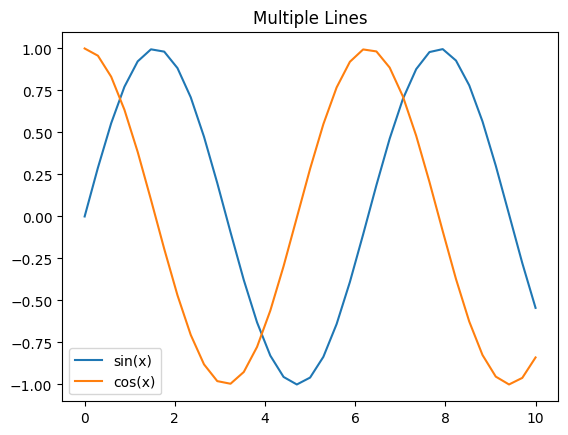

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")
ax.plot(x, y2, label="cos(x)")
ax.legend()
ax.set_title("Multiple Lines")
plt.show()

**2.) SCATTER PLOT**

Displays individual data points as dots on a coordinate system without connecting them.

It's perfect for exploring relationships between two continuous variables, identifying correlations, outliers, or clusters in data.

Scatter plots are widely used in statistical analysis to visualize how one variable might relate to another

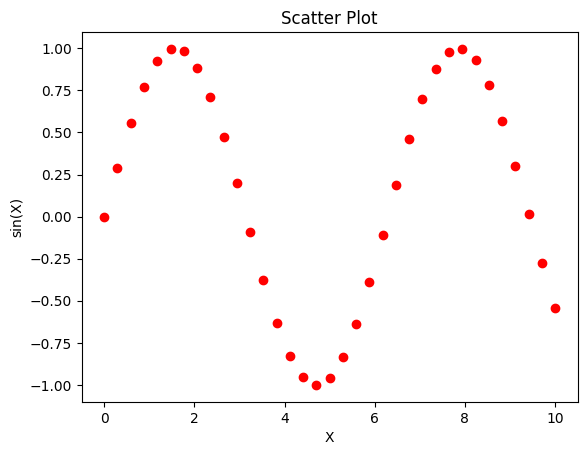

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y, c='red')
ax.set_title("Scatter Plot")
ax.set_xlabel("X")
ax.set_ylabel("sin(X)")
plt.show()

**3.) PIE CHART**

Displays data as slices of a circular "pie," where each slice represents a proportion of the whole.



Iideal for showing the relative sizes of parts that make up a complete dataset.

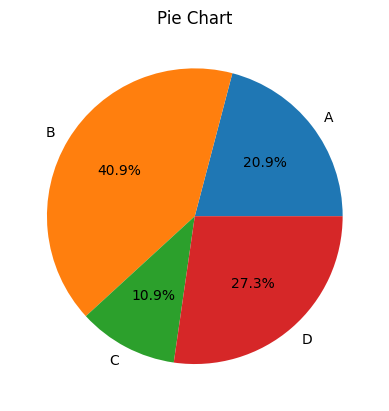

In [9]:
fig, ax = plt.subplots()
ax.pie(values, labels=categories, autopct='%1.1f%%')
ax.set_title("Pie Chart")
plt.show()

**4.) BAR CHART**

Used to represent categorical data, with bar height or length corresponding to the data values

Used for quickly comparing different values, for comparing quantities across different categories, showing rankings, or displaying survey results.

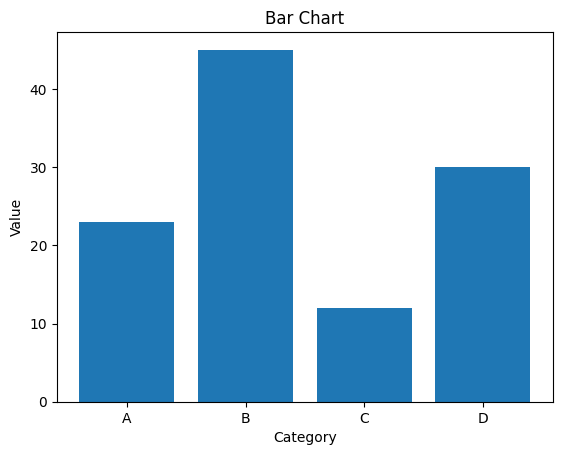

In [10]:
fig, ax = plt.subplots()
ax.bar(categories, values)
ax.set_title("Bar Chart")
ax.set_xlabel("Category")
ax.set_ylabel("Value")
plt.show()

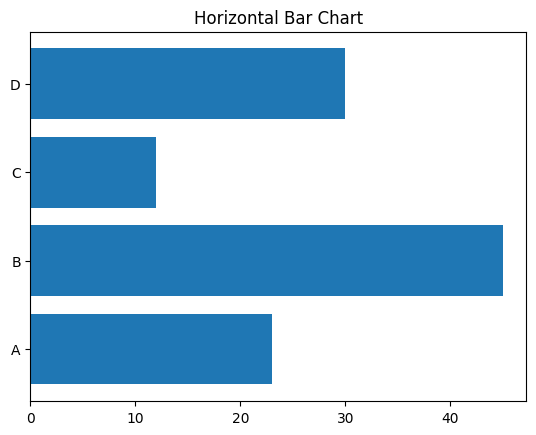

In [11]:
fig, ax = plt.subplots()
ax.barh(categories, values)
ax.set_title("Horizontal Bar Chart")
plt.show()

**5.) HISTOGRAM**

Histogram shows the distribution of a continuous variable
by dividing data into bins
and displaying the frequency of values in each bin as bars.

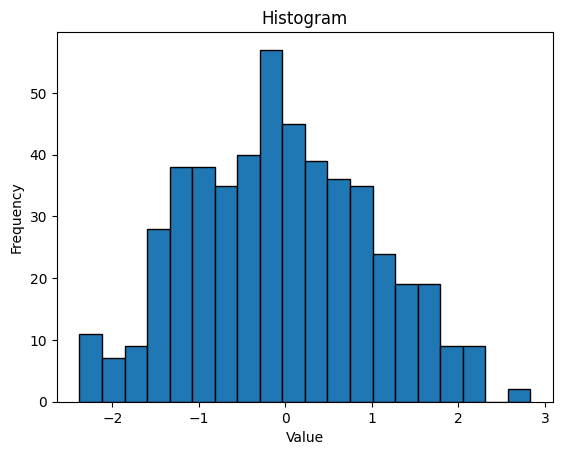

In [12]:
fig, ax = plt.subplots()
ax.hist(data, bins=20, edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
plt.show()

**6.) SUBPLOTS**

Show multiple subplots on the same graph.

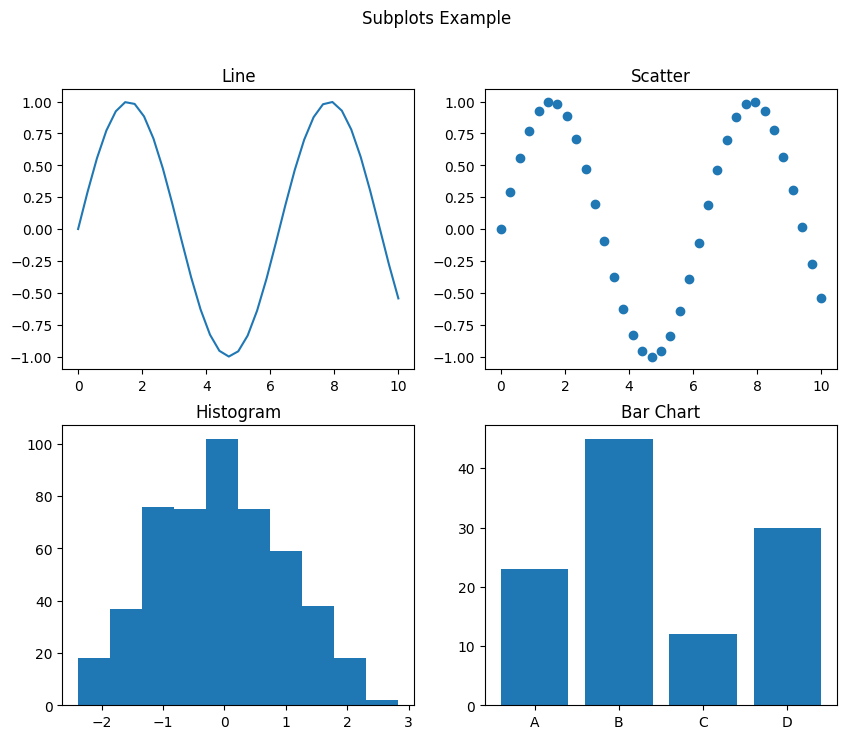

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x, y)
axs[0, 0].set_title("Line")

axs[0, 1].scatter(x, y)
axs[0, 1].set_title("Scatter")

axs[1, 0].hist(data)
axs[1, 0].set_title("Histogram")

axs[1, 1].bar(categories, values)
axs[1, 1].set_title("Bar Chart")

fig.suptitle("Subplots Example")
plt.show()

**7.) IMAGE DISPLAY**

How to show data that is an Image.

In [14]:
from matplotlib.colors import hsv_to_rgb

def get_image_data():
  # Image size
  h, w = 100, 100

  # Create a horizontal gradient of hue values from 0 to 1
  hue = np.linspace(0, 1, w)

  # Repeat the hue gradient for each row
  hue_matrix = np.tile(hue, (h, 1))

  # Full saturation and value for vivid colors
  saturation = np.ones((h, w))
  value = np.ones((h, w))

  # Stack into HSV image
  hsv_image = np.stack([hue_matrix, saturation, value], axis=-1)

  # Convert to RGB
  rainbow_image = hsv_to_rgb(hsv_image)

  return rainbow_image


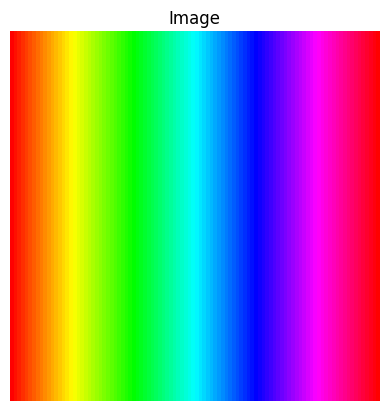

In [15]:
fig, ax = plt.subplots()
ax.imshow(get_image_data())
ax.axis('off')
ax.set_title("Image")
plt.show()

**8.) BOX PLOT**

Explanations of elements of box plot. Mean is optionaly shown as marker sometimes, because box plot should be robust to outliers. Median and Quartieles are robust to outliers, while Mean is not.

IQR used for outliers is calucalted using formula

IQR = Q3 - Q1

MEANING OF IQR,  Interquartile Range:


Interquartile Range (IQR) measures the spread of the middle 50% of your data.
Basically it is the range of values of box lines(Q3 and Q1), middle of your data.

Smaller IQR means data is more clustered, while larger IQR means data is more spread out.

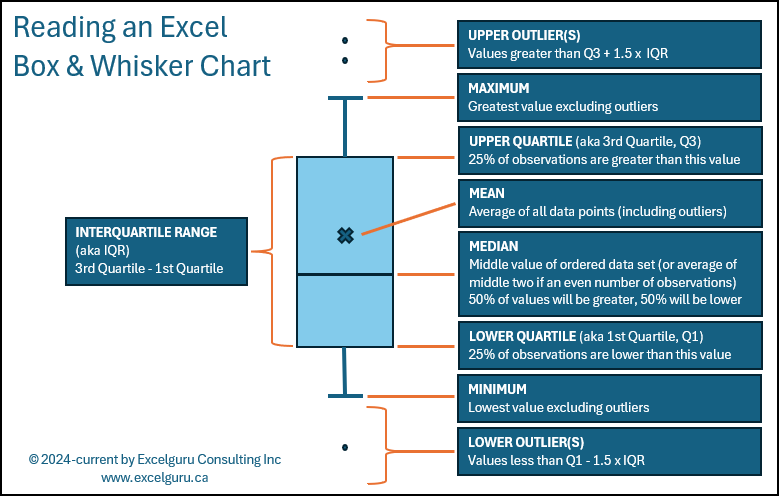

Summarizes a distribution,

In [16]:
data.mean(), data.std()

(np.float64(-0.06347744967699838), np.float64(1.0408649319464636))

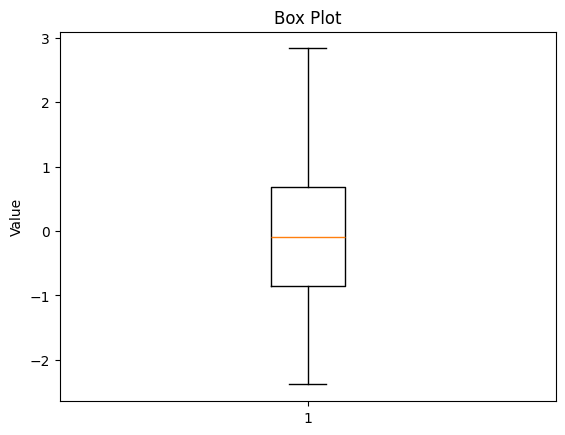

In [17]:
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Box Plot")
ax.set_ylabel("Value")
plt.show()

**9.) VIOLIN PLOT**

Shows the full distribution of a dataset.
Because of this we can visualy see

- where values are concentrated (wide parts)
- where values are rare (narrow parts)
- whether the distribution is normal or skewed
- whether it has multiple peaks (bimodal or multimodal)


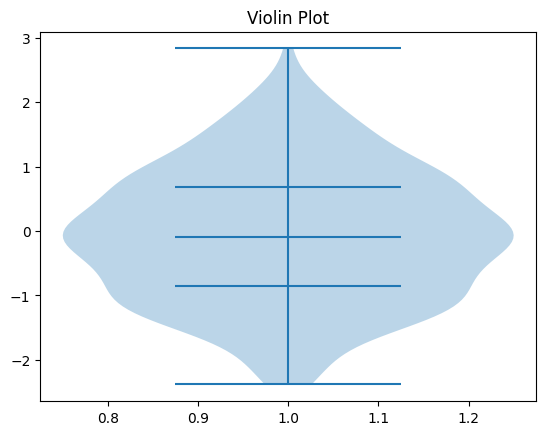

In [18]:
fig, ax = plt.subplots()
ax.violinplot(data, quantiles = [0.25, 0.5, 0.75])
ax.set_title("Violin Plot")
plt.show()

**EXAMPLE OF SHOWING VARIOUS DISTRIBUTIONS WITH BOTH LIBRARIES**

In [19]:
np.random.seed(0)

# Sample data with different shapes
group1 = np.random.normal(50, 10, 200)          # normal
group2 = np.random.exponential(30, 200) + 20    # skewed
group3 = np.concatenate([np.random.normal(40, 5, 150), np.random.normal(80, 5, 50)])  # bimodal

In [20]:
np.mean(group1), np.median(group1), np.std(group1)

(np.float64(50.70910493141161),
 np.float64(50.5416521074536),
 np.float64(10.214227686959953))

In [21]:
np.mean(group2), np.median(group2), np.std(group2)

(np.float64(50.99710754141532),
 np.float64(38.2932095749642),
 np.float64(32.32398668666825))

In [22]:
np.mean(group3), np.median(group3), np.std(group3)

(np.float64(49.51101446760485),
 np.float64(41.77943652554015),
 np.float64(17.74687150804008))

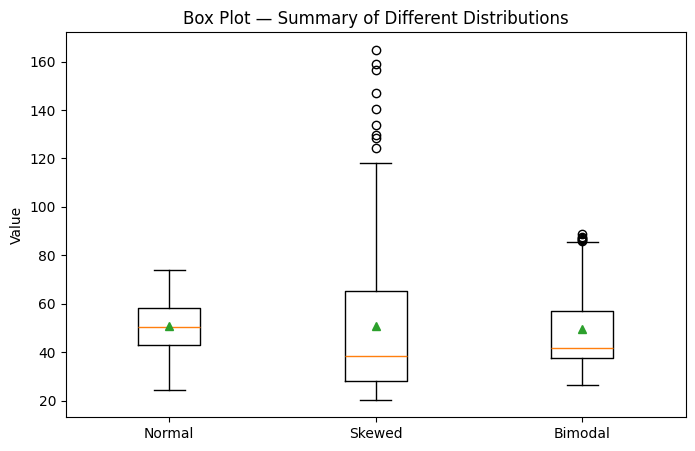

In [23]:
plt.figure(figsize=(8, 5))
plt.boxplot([group1, group2, group3], tick_labels=["Normal", "Skewed", "Bimodal"], showmeans=True)
plt.title("Box Plot — Summary of Different Distributions")
plt.ylabel("Value")
plt.show()

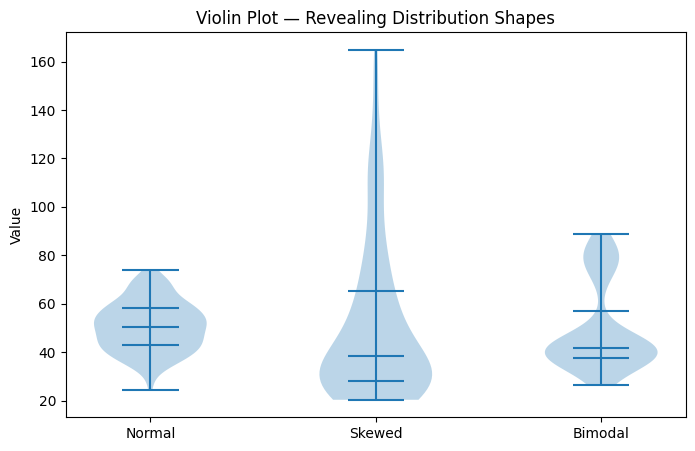

In [24]:
plt.figure(figsize=(8, 5))
plt.violinplot([group1, group2, group3], quantiles = [[0.25, 0.5, 0.75] for _ in range(3)])
plt.title("Violin Plot — Revealing Distribution Shapes")
plt.xticks([1, 2, 3], ["Normal", "Skewed", "Bimodal"])
plt.ylabel("Value")
plt.show()

**10.) HEATMAP**

Heatmap works by vizualizing one 2 dimensional matrix. Different color intensity is used to show larger and smaller values. What matrix actualy represents and its meaning changes, based on how it was constructed.

Some examples of heatmap usage:

*   Correlation heatmap, if one value increases/decreases how is other value affected(close to 1 positive correlation, close to -1 negative correlation, 0 no correlation)

*   Confusion matrices, show model performance across predicted vs. actual classes. So you see how often model predicts correct class and how often it misclassifies the class.

* Spatial Heatmaps, show are in a grid, where each cell represents some location, value in the cell represents intensity for this cell.

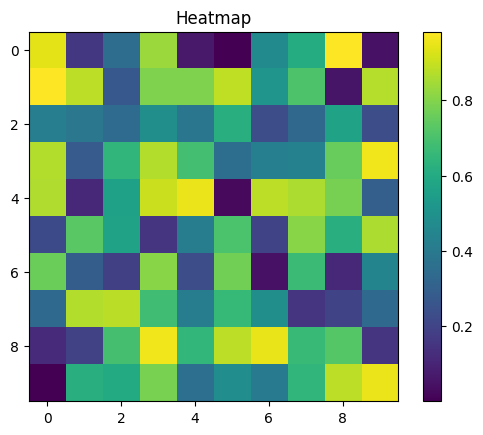

In [25]:
fig, ax = plt.subplots()
heatmap = ax.imshow(matrix, cmap='viridis')
fig.colorbar(heatmap, ax=ax)
ax.set_title("Heatmap")
plt.show()

**11.) ERROR BARS**

Show how far something is from data point.

These error bars can be vertical or horizontal(line drawn is either above/bellow or left/right).

These error bars can be symmetric or asymmetric, meaning same or different distance from values, on both sides.

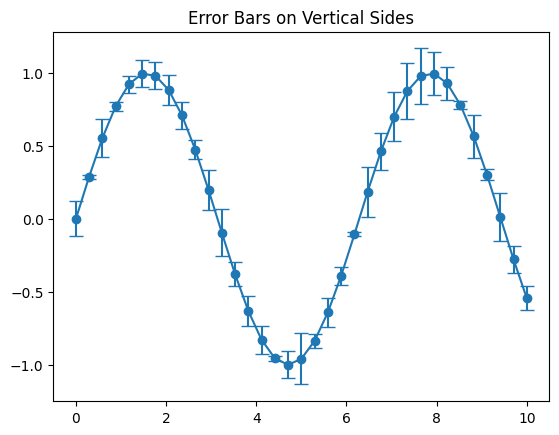

In [26]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=errors, fmt='o-', capsize=5)
ax.set_title("Error Bars on Vertical Sides")
plt.show()

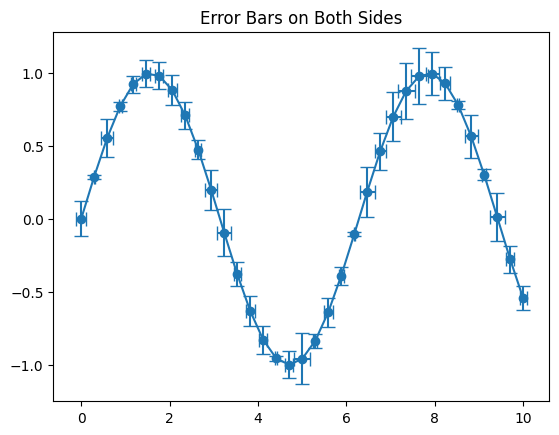

In [27]:
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=errors,  yerr=errors, fmt='o-', capsize=5)
ax.set_title("Error Bars on Both Sides")
plt.show()

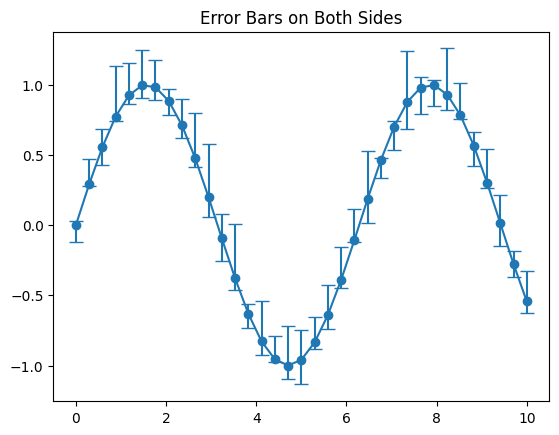

In [28]:
fig, ax = plt.subplots()
ax.errorbar(x, y,  yerr=[errors, errors_other], fmt='o-', capsize=5)
ax.set_title("Error Bars on Both Sides")
plt.show()